# Artificial Neural Networks (ANN)  with MLP Classifier 


In [30]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pickle import dump, load
from keras.utils import np_utils

%matplotlib inline

In [31]:
# Collect data
pickle_dir = 'TFS_Dataset/Pickle/'

In [32]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

# reshape image size
n_features = 1024  ## 32 * 32 = 1024

## Load Pickle file data


In [33]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train_gray.pkl'), 'rb')
X_train_gray,y_train_gray = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test_gray.pkl'), 'rb')
X_test_gray,y_test_gray = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [34]:
print("Number of Training examples =", len(X_train_gray))
print("Number of Testing examples =", len(X_test_gray))
print("Image data shape =", (X_train_gray.shape))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Image data shape = (39209, 32, 32)
Number of classes = 43


## Reshape training, testing and validation data


In [35]:
print("X_train_gray shape before reshape : ",X_train_gray.shape)
print("X_test_gray shape before reshape: ",X_test_gray.shape)

X_train_gray shape before reshape :  (39209, 32, 32)
X_test_gray shape before reshape:  (12630, 32, 32)


In [36]:
# building the input vector from the 32x32 pixels
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], n_features)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], n_features)

In [37]:
print("X_train_gray shape after reshape : ",X_train_gray.shape)
print("X_test_gray shape after reshape: ",X_test_gray.shape)


X_train_gray shape after reshape :  (39209, 1024)
X_test_gray shape after reshape:  (12630, 1024)


In [38]:
X_train_gray

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [255, 255, 252, ..., 226, 221, 222],
       [109, 128, 202, ...,  46,  49,  46],
       [174, 204, 203, ..., 105, 101, 100]], dtype=uint8)

## Standardize the data

In [39]:
X_train_gray = preprocessing.scale(X_train_gray)
X_test_gray = preprocessing.scale(X_test_gray)

In [40]:
X_train_gray

array([[-0.59255351, -0.48713397, -0.52921723, ..., -0.35216126,
        -0.1412604 , -0.24908881],
       [ 0.40507732,  0.87800471,  1.57016444, ...,  1.73709442,
         1.69009929,  2.02650958],
       [ 0.4575842 ,  1.15365771,  0.94034994, ..., -0.47783077,
        -0.45701207, -0.45310797],
       ...,
       [ 2.19031143,  2.19063805,  2.1474944 , ...,  2.47540282,
         2.41632813,  2.41885413],
       [ 0.2738101 ,  0.5235937 ,  1.49143763, ..., -0.35216126,
        -0.29913623, -0.3432515 ],
       [ 1.12704699,  1.52119505,  1.50455876, ...,  0.57465141,
         0.52181811,  0.50421273]])

In [41]:
print("y_train :",y_train_gray.shape)
print("y_test :",y_test_gray.shape)

y_train : (39209,)
y_test : (12630,)


# ANN Classifier
#### Defining (instantiating) an "object" from the sklearn class "MLPClassifier" (Multi-layer Perceptron (MLP)):

In [42]:
%%time

my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# Training ONLY on the training set:
my_ANN.fit(X_train_gray, y_train_gray)

Iteration 1, loss = 3.36762848
Iteration 2, loss = 3.11636325
Iteration 3, loss = 3.11896590
Iteration 4, loss = 2.98983591
Iteration 5, loss = 2.93870493
Iteration 6, loss = 2.87269832
Iteration 7, loss = 2.82035654
Iteration 8, loss = 2.80583064
Iteration 9, loss = 2.78352830
Iteration 10, loss = 2.75496929
Iteration 11, loss = 2.71649873
Iteration 12, loss = 2.68628292
Iteration 13, loss = 2.68920419
Iteration 14, loss = 2.66405005
Iteration 15, loss = 2.61934130
Iteration 16, loss = 2.58930321
Iteration 17, loss = 2.62959641
Iteration 18, loss = 2.65682724
Iteration 19, loss = 2.59706312
Iteration 20, loss = 2.55466003
Iteration 21, loss = 2.52192394
Iteration 22, loss = 2.52807435
Iteration 23, loss = 2.45934538
Iteration 24, loss = 2.53888635
Iteration 25, loss = 2.45417803
Iteration 26, loss = 2.50774150
Iteration 27, loss = 2.85339231
Iteration 28, loss = 2.83862796
Iteration 29, loss = 2.73697487
Iteration 30, loss = 2.46390554
Iteration 31, loss = 2.42610852
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3,),
              learning_rate_init=0.1, random_state=1, verbose=True)

In [43]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test_gray)

#prediction
score_ann = accuracy_score(y_test_gray, y_predict_ann)
print('\n','ANN Classifier with one hidden layer accuracy: ',score_ann)


 ANN Classifier with one hidden layer accuracy:  0.18836104513064134


### Repeating with a more complex Neural Network structure (2 Hidden Layers):


In [46]:
%%time

from sklearn.neural_network import MLPClassifier

my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# Training ONLY on the training set:
my_ANN.fit(X_train_gray, y_train_gray)

Iteration 1, loss = 3.27935939
Iteration 2, loss = 3.03723378
Iteration 3, loss = 2.99531562
Iteration 4, loss = 2.93206141
Iteration 5, loss = 2.83676092
Iteration 6, loss = 2.80282675
Iteration 7, loss = 2.75025990
Iteration 8, loss = 2.77072644
Iteration 9, loss = 2.76441698
Iteration 10, loss = 2.70033195
Iteration 11, loss = 2.74300664
Iteration 12, loss = 2.64697587
Iteration 13, loss = 2.76364353
Iteration 14, loss = 2.63741749
Iteration 15, loss = 2.67908794
Iteration 16, loss = 2.63340110
Iteration 17, loss = 2.64745576
Iteration 18, loss = 2.59091951
Iteration 19, loss = 2.58783720
Iteration 20, loss = 2.65809121
Iteration 21, loss = 2.62307834
Iteration 22, loss = 2.58691409
Iteration 23, loss = 2.63720827
Iteration 24, loss = 2.60998938
Iteration 25, loss = 2.55552724
Iteration 26, loss = 2.59846299
Iteration 27, loss = 2.60726317
Iteration 28, loss = 2.51404887
Iteration 29, loss = 2.56267838
Iteration 30, loss = 2.60475082
Iteration 31, loss = 2.59827983
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(6, 4),
              learning_rate_init=0.1, random_state=1, verbose=True)

In [47]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test_gray)


# prediction
score_ann = accuracy_score(y_test_gray, y_predict_ann)
print('\n','ANN Classifier with two hidden layer accuracy: ',score_ann)


 ANN Classifier with two hidden layer accuracy:  0.23412509897070466


### Estimating the Probability (likelihood) of happening the Event: 


In [48]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test_gray)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[12 13  1 ...  9  1 13] 

[[1.99790025e-03 6.23464567e-02 8.72787377e-02 ... 1.99476369e-02
  9.78907216e-02 3.68697444e-02]
 [1.60801886e-03 1.32564488e-02 6.56352975e-02 ... 3.47581127e-03
  3.66755145e-04 3.64416699e-04]
 [7.80882412e-02 2.11190202e-01 1.55311526e-01 ... 4.97701560e-03
  8.59488283e-04 5.31382995e-04]
 ...
 [6.52167106e-02 6.53515386e-02 1.12047444e-01 ... 1.31089016e-03
  1.16854183e-05 1.04260328e-05]
 [3.14103198e-02 1.55466881e-01 1.54635996e-01 ... 6.92489157e-03
  3.49427698e-03 3.79889183e-03]
 [3.25878932e-04 2.05694889e-03 1.58184688e-02 ... 5.86825411e-04
  2.34524103e-05 3.83444553e-05]]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_gray, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.00000000e+00 8.39630563e-05 6.71704450e-04 6.71704450e-04
 1.09151973e-03 1.09151973e-03 1.34340890e-03 1.34340890e-03
 1.42737196e-03 2.98908480e-02 2.99748111e-02 3.00587741e-02
 3.00587741e-02 3.01427372e-02 3.01427372e-02 3.03946264e-02
 3.03946264e-02 3.04785894e-02 3.04785894e-02 3.05625525e-02
 3.05625525e-02 3.08144416e-02 3.08144416e-02 3.13182200e-02
 3.13182200e-02 3.14861461e-02 3.14861461e-02 3.17380353e-02
 3.17380353e-02 3.19059614e-02 3.19059614e-02 3.22418136e-02
 3.22418136e-02 3.28295550e-02 3.28295550e-02 3.35852225e-02
 3.35852225e-02 3.36691856e-02 3.36691856e-02 3.37531486e-02
 3.37531486e-02 3.46767422e-02 3.46767422e-02 3.54324097e-02
 3.54324097e-02 3.56842989e-02 3.59361881e-02 3.61041142e-02
 3.61880772e-02 3.63560034e-02 7.33837112e-02 7.43912678e-02
 7.43912678e-02 7.49790092e-02 7.49790092e-02 7.51469353e-02
 7.51469353e-02 7.54827876e-02 7.54827876e-02 7.59865659e-02
 7.59865659e-02 7.62384551e-02 7.62384551e-02 7.64063812e-02
 7.64063812e-02 7.741393

### AUC:

In [50]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.8758060453400505


# ROC Curve:

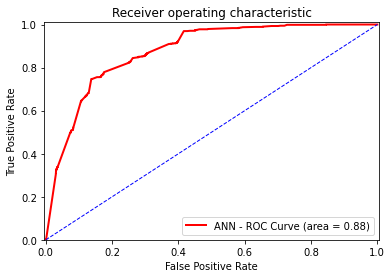

In [51]:
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ANN - ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Confusion Matrix:


In [52]:
cm_ANN = metrics.confusion_matrix(y_test_gray, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[  0  31   0 ...   0   0   0]
 [  0 364   2 ...   0   0   0]
 [  0 263   1 ...   0   0   0]
 ...
 [  0  23   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


# Cross-Validation:

## Combine training and testing data :


In [53]:
X_new = np.concatenate((X_train_gray, X_test_gray))
y_new = np.concatenate((y_train_gray, y_test_gray))

In [54]:
X_new

array([[-0.59255351, -0.48713397, -0.52921723, ..., -0.35216126,
        -0.1412604 , -0.24908881],
       [ 0.40507732,  0.87800471,  1.57016444, ...,  1.73709442,
         1.69009929,  2.02650958],
       [ 0.4575842 ,  1.15365771,  0.94034994, ..., -0.47783077,
        -0.45701207, -0.45310797],
       ...,
       [ 0.1932013 ,  0.01714963,  0.95272565, ...,  0.9497528 ,
         0.85798182,  0.17091457],
       [-0.49833476, -0.6322847 , -0.61976803, ..., -0.43242756,
        -0.43029419, -0.46146959],
       [-0.22714415, -0.05049978, -0.22664461, ..., -0.14970885,
         1.60300891,  2.05264308]])

In [55]:
y_new

array([ 6, 33, 17, ...,  4,  1, 38])

In [56]:
print("X:",X_new.shape)
print("y:",y_new.shape)

X: (51839, 1024)
y: (51839,)


### Applying 10-fold Cross Validation for ANN classifier:


In [57]:
%%time

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# CV:
accuracy_list = cross_val_score(my_ANN, X_new, y_new, cv=10, scoring='accuracy')

Iteration 1, loss = 3.24016734
Iteration 2, loss = 2.97809772
Iteration 3, loss = 2.93241660
Iteration 4, loss = 2.91125662
Iteration 5, loss = 2.83494021
Iteration 6, loss = 2.78107909
Iteration 7, loss = 2.72683473
Iteration 8, loss = 2.68371715
Iteration 9, loss = 2.76518831
Iteration 10, loss = 2.77165658
Iteration 11, loss = 2.63793425
Iteration 12, loss = 2.63464027
Iteration 13, loss = 2.68187563
Iteration 14, loss = 2.60174349
Iteration 15, loss = 2.64407138
Iteration 16, loss = 2.55853834
Iteration 17, loss = 2.52938907
Iteration 18, loss = 2.47071841
Iteration 19, loss = 2.50418892
Iteration 20, loss = 2.54797817
Iteration 21, loss = 2.47636677
Iteration 22, loss = 2.44073778
Iteration 23, loss = 2.47264581
Iteration 24, loss = 2.41657430
Iteration 25, loss = 2.38615442
Iteration 26, loss = 2.48255134
Iteration 27, loss = 2.41925890
Iteration 28, loss = 2.35663232
Iteration 29, loss = 2.41177946
Iteration 30, loss = 2.42274924
Iteration 31, loss = 2.40728531
Iteration 32, los

Iteration 27, loss = 2.50901770
Iteration 28, loss = 2.51917007
Iteration 29, loss = 2.53293763
Iteration 30, loss = 2.49737159
Iteration 31, loss = 2.46862556
Iteration 32, loss = 2.47899116
Iteration 33, loss = 2.48205278
Iteration 34, loss = 2.47981048
Iteration 35, loss = 2.48643733
Iteration 36, loss = 2.40340280
Iteration 37, loss = 2.44609934
Iteration 38, loss = 2.39623274
Iteration 39, loss = 2.35900104
Iteration 40, loss = 2.41606989
Iteration 41, loss = 2.43366522
Iteration 42, loss = 2.36480477
Iteration 43, loss = 2.36763284
Iteration 44, loss = 2.35532461
Iteration 45, loss = 2.32444828
Iteration 46, loss = 2.32698497
Iteration 47, loss = 2.31512020
Iteration 48, loss = 2.28193829
Iteration 49, loss = 2.39930457
Iteration 50, loss = 2.32101657
Iteration 51, loss = 2.27816691
Iteration 52, loss = 2.25583564
Iteration 53, loss = 2.26874982
Iteration 54, loss = 2.21944699
Iteration 55, loss = 2.28380950
Iteration 56, loss = 2.24082322
Iteration 57, loss = 2.30939574
Iteratio

Iteration 65, loss = 1.92897540
Iteration 66, loss = 1.99759450
Iteration 67, loss = 1.91984141
Iteration 68, loss = 1.94124893
Iteration 69, loss = 2.02494526
Iteration 70, loss = 1.96048009
Iteration 71, loss = 1.91352480
Iteration 72, loss = 1.97809996
Iteration 73, loss = 1.95265057
Iteration 74, loss = 1.88594761
Iteration 75, loss = 1.94893889
Iteration 76, loss = 1.90401552
Iteration 77, loss = 1.89612278
Iteration 78, loss = 1.91375154
Iteration 79, loss = 1.94348949
Iteration 80, loss = 1.93501129
Iteration 81, loss = 1.88337223
Iteration 82, loss = 2.01941855
Iteration 83, loss = 1.91067881
Iteration 84, loss = 1.88536172
Iteration 85, loss = 1.90283592
Iteration 86, loss = 1.99954459
Iteration 87, loss = 1.97498979
Iteration 88, loss = 1.92021494
Iteration 89, loss = 1.98986614
Iteration 90, loss = 1.96779371
Iteration 91, loss = 1.91637449
Iteration 92, loss = 1.87022454
Iteration 93, loss = 1.86508324
Iteration 94, loss = 1.93386344
Iteration 95, loss = 2.02469140
Iteratio

Iteration 76, loss = 2.10350487
Iteration 77, loss = 2.06706859
Iteration 78, loss = 2.03698744
Iteration 79, loss = 2.06744360
Iteration 80, loss = 2.14412750
Iteration 81, loss = 2.15313767
Iteration 82, loss = 2.17070615
Iteration 83, loss = 2.10508504
Iteration 84, loss = 2.01149629
Iteration 85, loss = 2.08719737
Iteration 86, loss = 2.02885099
Iteration 87, loss = 2.00023251
Iteration 88, loss = 2.06441319
Iteration 89, loss = 2.06787622
Iteration 90, loss = 2.03189158
Iteration 91, loss = 1.98244912
Iteration 92, loss = 2.04786791
Iteration 93, loss = 2.01854074
Iteration 94, loss = 1.97108142
Iteration 95, loss = 2.00354626
Iteration 96, loss = 2.06168558
Iteration 97, loss = 1.99395254
Iteration 98, loss = 2.12140885
Iteration 99, loss = 1.92060225
Iteration 100, loss = 2.08597861
Iteration 101, loss = 2.01092821
Iteration 102, loss = 2.03978345
Iteration 103, loss = 1.93020252
Iteration 104, loss = 1.93738823
Iteration 105, loss = 1.96327659
Iteration 106, loss = 1.99326821
I

Iteration 137, loss = 1.97019019
Iteration 138, loss = 1.83574316
Iteration 139, loss = 1.83103924
Iteration 140, loss = 1.86157002
Iteration 141, loss = 1.84679041
Iteration 142, loss = 1.92915845
Iteration 143, loss = 1.96357786
Iteration 144, loss = 1.87065122
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
CPU times: user 25min 47s, sys: 3min 49s, total: 29min 37s
Wall time: 5min 1s


In [58]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print('The ANN With Cross-Validation accuracy: ',accuracy_cv)

The ANN With Cross-Validation accuracy:  0.401127056074822


# Find the number of hidden layers by using Grid Search CV 

In [29]:
%%time
from  sklearn.model_selection  import  GridSearchCV
# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(2,9)]
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

my_ANN = MLPClassifier(activation='logistic', solver='adam',alpha=1e-5, random_state=1, 
                        learning_rate_init = 0.1, verbose=False, tol=0.0001, max_iter=400)

grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')
grid.fit(X_new, y_new)

print("Best ANN score :",grid.best_score_)
print("Best ANN Hidden layer size:",grid.best_params_,'\n')

{'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,), (7,), (8,)]} 

Best ANN score : 0.580374195643164
Best ANN Hidden layer size: {'hidden_layer_sizes': (8,)} 

CPU times: user 2h 19min 7s, sys: 39min 55s, total: 2h 59min 3s
Wall time: 35min 20s
